## Question 1
Selon wikipedia, la gamme d'énergie des protons va de 70 MeV à 250 MeV. L'énergie maximale serait donc de 250 MeV. Ces niveaux d'énergies dépendent de la pénétration désirée pour le proton. Les facteurs de lorentz sont $\gamma$ et $\beta$ qui représentent :

$$\gamma=\frac{1}{\sqrt{1-\beta^{2}}}~avec~\beta=\frac{v}{c}$$

Comme le facteur de Lorentz sous-entend des vitesses relativistes alors on obtient $T$, l'énergie cinétique relativiste, selon :

$$T=\gamma mc^{2}-mc^{2}=mc^{2}(\gamma-1)$$

Il est possible d'isoler $\gamma$ ce qui nous donne :

$$\gamma=\frac{T}{mc^{2}}+1$$

## Question 2
Nous avons la masse volumique selon :

$$\rho=\frac{m}{V}$$

Ainsi que $N$, le nombre d'atomes par gramme. On cherche $n_e$, la densité électronique pour une matière donnée, donc $n_e~\left[\frac{e}{cm^3}\right]$. Du NIST, on a la masse volumique de l'os cortical et de l'eau en $g/cm^3$ ainsi que la fraction par masse des différents atomes qui compose la matière. Nous avons donc :

$$n_e=\rho NZ_{t}=\rho N\sum_{i=1}^{n}Z_{i}a_{i}$$

On peut obtenir $N$ en cosnidérant les masses molaires des différents atomes qui compose la matière :

$$N~\left[\frac{e^{-}}{cm^3}\right]\to \frac{N_{A}}{M_{m}}\cdot\rho\cdot Z_{t}~\left[\frac{atomes}{mol}\cdot\frac{mol}{g}\cdot\frac{g}{cm^3}\cdot e^{-}\right]$$

Donc :

$$n_e=\rho NZ_{t}=\rho \sum_{i=1}^{n}Z_{i}a_{i}\frac{N_{A}}{M_{mi}}$$

où $N_{A}$ est le nombre d'Avogadro et $M_{mi}$ est la masse molaire d'un atome qui compose la substance. Pour l'eau, avec $\rho=1~\left[\frac{g}{cm^3}\right]$, nous avons donc :

$$n_e=\left(\frac{1\cdot0.111894}{1.660540199\times10^{-24}}+\frac{8\cdot0.888106}{2.656698265\times10^{-23}}\right)~\left[\frac{e^{-}}{cm^3}\right]=3.3481\times10^{23}~\left[\frac{e^{-}}{cm^3}\right]$$

Avec $I=75~\left[eV\right]$. Les masses sont déterminées à partir des masses atomiques des éléments trouvées de www.ptable.com. Pour l'os cortical, avec $\rho=1.85~\left[\frac{g}{cm^3}\right]$ nous avons :

$$n_e=\left(.~.~.\right)=5.8121\times10^{23}~\left[\frac{e^{-}}{cm^3}\right]$$

avec $I=106.4~\left[eV\right]$. Les courbes sont donc :


5.807877201876892e+23


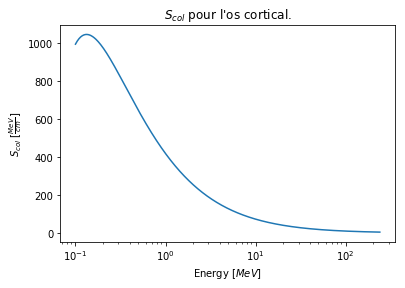

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from numpy import linspace, cos, pi, tan, ones, copy, random
from scipy import integrate
%matplotlib inline


def beta(g):
    return np.sqrt(1 - 1 / (g ** 2))


def gamma(t):
    mProton = 938.272
    return t / mProton + 1


def tMax(g):
    mElectron = 0.51099895000
    mPronton = 938.272
    return (2 * mElectron * ((g ** 2) - 1)) / (1 + 2 * g * (mElectron / mPronton) + ((mElectron / mPronton) ** 2))


def stoppingPower(nElectron, protonEnergy, i):
    rElectron = 2.81794033e-13
    mElectron = 0.51099895000
    g = gamma(protonEnergy)
    b = beta(g)
    return 2 * pi * (rElectron ** 2) * mElectron * nElectron * (1 / (b ** 2)) *\
           (np.log((2 * mElectron * (b ** 2) * (g ** 2) * tMax(g))/(i ** 2)) - 2 * (b ** 2))


energies = np.linspace(0.1, 240, 100000)

bHydrogen = (1 * 0.047234 * 6.022e23) / 1.00784
bCarbon = (6 * 0.144330 * 6.022e23) / 12.0096
bNitrogen = (7 * 0.041990 * 6.022e23) / 14.00643
bOxygen = (8 * 0.446096 * 6.022e23) / 15.99903
bMagnesium = (12 * 0.002200 * 6.022e23) / 24.304
bPhosphorus = (15 * 0.104970 * 6.022e23) / 30.973761998
bSulfur = (16 * 0.003150 * 6.022e23) / 32.059
bCalcium = (20 * 0.209930 * 6.022e23) / 40.078
bZinc = (30 * 0.000100 * 6.022e23) / 65.38
bNElectron = 1.85 * (bHydrogen + bCarbon + bNitrogen + bOxygen + bMagnesium + bPhosphorus + bSulfur + bCalcium + bZinc)
print(bNElectron)
bI = 106.4 / 1000000
plt.plot(energies, stoppingPower(bNElectron, energies, bI))
plt.title(r"$S_{col}$ pour l'os cortical.")
plt.xscale('log')
plt.xlabel(r'Energy $[MeV]$')
plt.ylabel(r'$S_{col}$ $[\frac{MeV}{cm}]$')
plt.show()

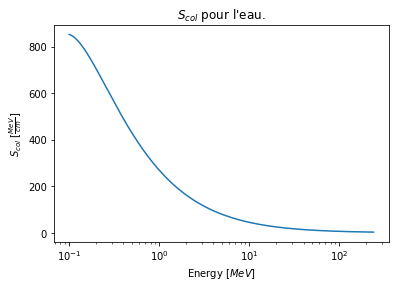

In [65]:
hydrogen = (1 * 0.111894 * 6.022e23) / 1.00784
oxygen = (8 * 0.888106 * 6.022e23) / 15.99903
nElectron = 1 * (hydrogen + oxygen)
i = 75 / 1000000
plt.plot(energies, stoppingPower(nElectron, energies, i))
plt.title(r"$S_{col}$ pour l'eau.")
plt.xscale('log')
plt.xlabel(r'Energy $[MeV]$')
plt.ylabel(r'$S_{col}$ $[\frac{MeV}{cm}]$')
plt.show()

## Question 3
Selon le NIST, le $R_{CSDA}$ est en $\frac{g}{cm^2}$ (voir la page https://physics.nist.gov/cgi-bin/Star/ap_table.pl). $\frac{S_{col}}{\rho}$ est le pouvoir d'arrêt collisionnel massique. On sait que $S_{col}$ est :

$$S_{col}=2\pi r_{e}^{2}m_{e}c^{2}n_{e}\frac{1}{\beta^{2}}\left[ln\left(\frac{2m_{e}c^{2}\beta^{2}\gamma^{2}T_{e}^{max}}{I^{2}}\right)-2\beta^{2}\right]~\left[\frac{MeV}{cm}\right]$$

$\rho$ est la masse volumique, donc :

$$\rho=\frac{m}{V}~\left[\frac{g}{cm^3}\right]$$

Les unités de $\frac{S_{col}}{\rho}$ sont donc :

$$\left[\frac{MeV}{cm}\right]\cdot\left[\frac{cm^3}{g}\right]=\left[\frac{MeV\cdot cm^2}{g}\right]$$

Comme nous avons $\frac{1}{S_{col}/\rho}$, alors nous avons :

$$\left[\frac{g}{MeV\cdot cm^2}\right]$$

En intégrant sur $T$, il ne reste que :

$$\left[\frac{g}{cm^2}\right]$$

On peut donc constater l'homogénéité de l'équation.

## Question 4
Sur le site du NIST et avec l'eau, on peut voir que le pouvoir d'arrêt collisionnel total prend en compte le pouvoir d'arrêt électronique et nucléaire. Or, plus le proton est énergétique, plus le pouvoir d'arrêt est négligeable et le pouvoir d'arrêt électronique devient de plus en plus dominant. Pour un proton d'envirron $100\left[MeV\right]$, la différence entre le pouvoir d'arrêt nucléaire et électronique est dans l'ordre de $10^2$ à $10^3$ et augmente jusqu'à $10^6$ pour des protons d'énergies de $1000\left[MeV\right]$.

Voir l'exemple de l'eau à la page : https://physics.nist.gov/cgi-bin/Star/ap_table.pl

## Question 6

In [66]:
class Integration:
    """
    Classe qui permet de faire l'intégration de fonctions réelle.
    """

    def __init__(self, fonction_integrer=1, bornes=[1,2], nombre_de_pas=1, intervalle_variable=None):
        """
        Le constructeur de l'intégration.
        Args:
            fonction_integrer (fonction): La fonction qui sera à intégrer numériquement.
            bornes (array like): Donne les bornes d'intégration numérique.
            nombre_de_pas (int): Nombre de pas dans l'intégration numérique.
            emplacement_variable (array like): On peut donné directement l'emplacement des pas dans l'inégration entre
             les bornes.
        """

        self.intervalle_variable = intervalle_variable
        self.fonction_integrer=fonction_integrer
        self.bornes = bornes
        self.nombre_de_pas = nombre_de_pas


class Integration_trapezes(Integration):
    """
    Classe de l'intégration par méthode des trapèzes
    """
    def __init__(self, fonction_integrer=1, bornes=np.array([1, 2]), nombre_de_pas=1, intervalle_variable=None):
        """
        Le constructeur de l'intégration.
        Args:
            fonction_integrer (fonction): La fonction qui sera à intégrer numériquement.
            bornes (array like): Donne les bornes d'intégration numérique.
            nombre_de_pas (int): Nombre de pas dans l'intégration numérique.
            emplacement_variable (array like): On peut donné directement l'emplacement des pas dans l'inégration entre
             les bornes.
        """
        super().__init__(fonction_integrer, bornes, nombre_de_pas, intervalle_variable)
        if intervalle_variable == None:
            self.array_integration = np.linspace(self.bornes[0], self.bornes[1], self.nombre_de_pas + 1)
        else:
            self.array_integration = intervalle_variable

        array_valeur_fonction = np.array([])
        for i in self.array_integration:
            array_valeur_fonction = np.append(array_valeur_fonction, self.fonction_integrer(i))

        self.array_valeur_fonction = array_valeur_fonction

    def update_array_integration(self):
        self.array_integration = np.linspace(self.bornes[0], self.bornes[1], self.nombre_de_pas + 1)

    def update_array_valeur_fonction(self):
        array_valeur_fonction = np.array([])
        for i in self.array_integration:
            array_valeur_fonction = np.append(array_valeur_fonction, self.fonction_integrer(i))

        self.array_valeur_fonction = array_valeur_fonction

    def get_array_valeur_fonction(self):
        return self.array_valeur_fonction

    def get_array_integration(self):
        return self.array_integration

    def get_fonction_integrer(self):
        return self.fonction_integrer

    def set_fonction_integrer(self, nouvelle_fonction_integrer):
        self.fonction_integrer = nouvelle_fonction_integrer
        self.update_array_integration()

    def get_bornes(self):
        return self.bornes

    def set_bornes(self, nouvelles_bornes):
        self.bornes = nouvelles_bornes
        self.update_array_integration()

    def get_nombre_de_pas(self):
        return self.nombre_de_pas

    def set_nombre_de_pas(self, nouveau_nombre_de_pas):

        if nouveau_nombre_de_pas/self.nombre_de_pas % 2 == 0:
            nombre_de_fois_par_2 = int(np.floor(np.log(nouveau_nombre_de_pas/self.nombre_de_pas)/np.log(2)))
            if nombre_de_fois_par_2 == np.log(nouveau_nombre_de_pas)/np.log(2):
                for i in range(nombre_de_fois_par_2):
                    self.double_nombre_de_pas()
            self.nombre_de_pas = nouveau_nombre_de_pas
        else:
            self.nombre_de_pas = nouveau_nombre_de_pas
            self.update_array_integration()
            self.update_array_valeur_fonction()

    def double_nombre_de_pas(self):
        self.nombre_de_pas = 2 * self.nombre_de_pas
        self.update_array_integration()

        nouvel_array_valeur_fonction = np.array([])

        for i in range(self.nombre_de_pas + 1):
            if i % 2 == 0:
                nouvel_array_valeur_fonction = \
                    np.append(nouvel_array_valeur_fonction, self.array_valeur_fonction[int(i/2)])
            else:
                nouvel_array_valeur_fonction = \
                    np.append(nouvel_array_valeur_fonction, self.fonction_integrer(self.array_integration[i]))

        self.array_valeur_fonction = nouvel_array_valeur_fonction

    def get_intervalle_variable(self):
        return self.intervalle_variable

    def set_intervale_variable(self, nouvel_intervalle_variable):
        self.intervalle_variable = nouvel_intervalle_variable
        self.update_array_integration()

    def aire_trapeze (self, index_droite):
        return (self.array_integration[index_droite] - self.array_integration[index_droite-1])\
               * (self.array_valeur_fonction[index_droite] + self.array_valeur_fonction[index_droite-1]) / 2

    def aire_totale(self):
        aire_totale = 0
        for index_droite in range(len(self.array_integration) - 1):
            aire_totale += self.aire_trapeze(index_droite+1)
        return aire_totale

    def incertitude_pratique(self):
        aire_N = self.aire_totale()
        self.set_nombre_de_pas(int(2 * self.nombre_de_pas))
        aire_2N = self.aire_totale()
        self.set_nombre_de_pas(int(self.nombre_de_pas / 2))

        return (aire_2N - aire_N)/3


def tMax(g):
    mElectron = 0.51099895000
    mPronton = 938.272
    return (2 * mElectron * ((g ** 2) - 1)) / (1 + 2 * g * (mElectron / mPronton) + (mElectron / mPronton) ** 2)


def beta(g):
    return np.sqrt(1 - 1 / (g ** 2))


def gamma(t):
    mProton = 938.272
    return t / mProton + 1


def S_col_eau(x):
    i = 75 / 1000000
    rElectron = 2.81e-13
    nElectron = 3.3428e23
    mElectron = 0.51099895000

    g = gamma(x)
    b = beta(g)


    return 1 / (2 * pi * rElectron ** 2 * mElectron * nElectron * b ** -2 *
                (np.log((2 * mElectron * b ** 2 * g ** 2 * tMax(g))/(i ** 2)) - 2 * b ** 2))

## Question 9
On utilise l'implémentation de Newman. On obtient le code suivant :

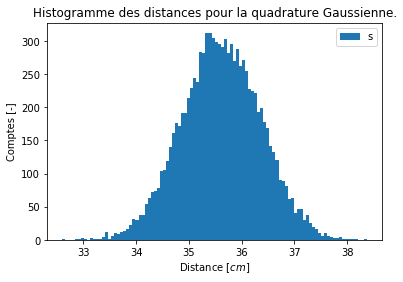

N après optimisation :  30


In [67]:
def gaussianProtonsGenerator():
    return random.normal(240, 3, 10000)


def f_eau(x):
    i = 75 / 1000000
    rElectron = 2.81e-13
    nElectron = 3.3428e23
    mElectron = 0.51099895000

    g = gamma(x)
    b = beta(g)
    return 1 / (2 * pi * rElectron ** 2 * mElectron * nElectron * b ** -2 *
                (np.log((2 * mElectron * b ** 2 * g ** 2 * tMax(g))/(i ** 2)) - 2 * b ** 2))


def f_os(x):
    i = 106.4 / 1000000
    rElectron = 2.81e-13
    nElectron = 5.8079e23
    mElectron = 0.51099895000

    g = gamma(x)
    b = beta(g)
    return 1 / (2 * pi * rElectron ** 2 * mElectron * nElectron * b ** -2 *
                (np.log((2 * mElectron * b ** 2 * g ** 2 * tMax(g))/(i ** 2)) - 2 * b ** 2))

def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3, 4 * N - 1, N) / (4 * N + 2)
    x = cos(pi * a + 1 / (8 * N * N * tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N, float)
        p1 = copy(x)
        for k in range(1,N):
            p0, p1 = p1,((2 * k + 1) * x * p1 - k * p0)/(k + 1)
        dp = (N + 1)*(p0 - x * p1)/(1 - x * x)
        dx = p1 / dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2 * (N + 1) * (N + 1) / (N * N * (1 - x * x) * dp * dp)

    return x, w


def gaussianQuadrature(N, a, b):
    x, w = gaussxw(N)
    xp = 0.5 * (b - a) * x + 0.5 * (b + a)
    wp = 0.5 * (b - a) * w

    # Perform the integration
    s = 0
    for k in range(N):
        s += wp[k] * f_eau(xp[k])
    return s


def optimalQuadrature(a, b):
    N = 10
    s1 = gaussianQuadrature(N, a, b)
    delta = 1
    while delta >= 1e-9:
        N += 1
        s2 = gaussianQuadrature(N, a, b)
        delta = s1 - s2
        s1 = s2
    return N


protons = gaussianProtonsGenerator()
N = optimalQuadrature(3, 240)

distances = []
for proton in protons:
    a = 3
    b = proton
    distance = gaussianQuadrature(N, a, b)
    distances.append(distance)

plt.hist(distances, 100)
plt.title("Histogramme des distances pour la quadrature Gaussienne.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel('Comptes [-]')
plt.legend('show')
plt.show()
print('N après optimisation : ', N)

## Question 10
Pour la question 10, on réutilise la méthode des trapèzes de la question 6.

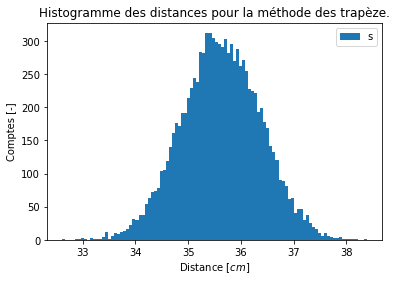

In [68]:
distances = []
for proton in protons:
    integration = Integration_trapezes(f_eau, bornes=[0.0001, proton], nombre_de_pas=1000)
    distances.append(integration.aire_totale())

plt.hist(distances, 100)
plt.title("Histogramme des distances pour la méthode des trapèze.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel('Comptes [-]')
plt.legend('show')
plt.show()

## Question 11
Pour la question 11, on utilise la librairie scipy.

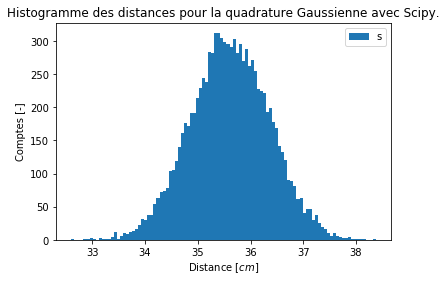

In [69]:
distances = []
for proton in protons:
    distances.append(integrate.quad(f_eau, 3, proton)[0])

plt.hist(distances, 100)
plt.title("Histogramme des distances pour la quadrature Gaussienne avec Scipy.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel('Comptes [-]')
plt.legend('show')
plt.show()

## Question 12
Comme il est question d'un grand nombre de protons et de beaucoup d'opérations simple, il nous semble que l'idéal, pour augmenter le nombre de protons et garder une certaine rapidité, serait d'utiliser des GPUs et donc de divisé les protons en groupes qui seront traités à la suite par les différents processeurs du GPU.

Sinon, basé sur le fait que l'on a une distribution normale et en s'inspirant des histogrammes : On remarque que l'on peut diviser les valeurs en "bins", c'est-à-dire que l'on rassemble les valeurs que l'on juge similaire ensemble. En précisant une certaine précision, il serait peut-être possible de réutiliser certaines intégrales pour certains protons en rassemblant tous les protons d'une "famille" ensemble.

## Question 13
Le dépot d'énergie en fonction de la profondeur est exprimé selon le code suivant :

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


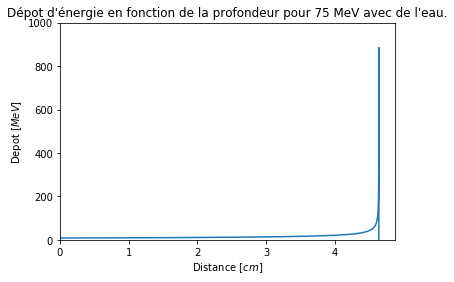

In [70]:
energies = list(np.linspace(75, 0, 10000))

depot = np.array([])
distanceTotale = np.array([])

for i in range(len(energies) - 1):
    pas = integrate.quad(f_eau, energies[i + 1], energies[i])[0]
    depot = np.append(depot, (energies[i] - energies[i + 1]) / pas)
    distanceTotale = np.append(distanceTotale, pas)
distanceTotale = list(np.cumsum(distanceTotale))

plt.plot(distanceTotale, depot)
plt.title("Dépot d'énergie en fonction de la profondeur pour 75 MeV avec de l'eau.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel(r'Depot [$MeV$]')
plt.axis(xmin=0, ymin=0, ymax=1000)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


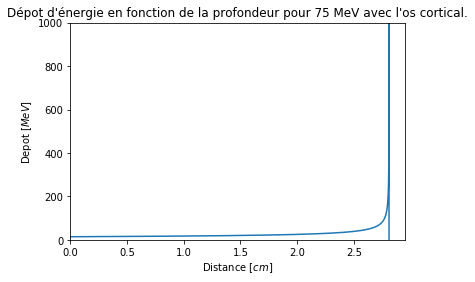

In [71]:
energies = list(np.linspace(75, 0, 10000))

depot = np.array([])
distanceTotale = np.array([])

for i in range(len(energies) - 1):
    pas = integrate.quad(f_os, energies[i + 1], energies[i])[0]
    depot = np.append(depot, (energies[i] - energies[i + 1]) / pas)
    distanceTotale = np.append(distanceTotale, pas)
distanceTotale = list(np.cumsum(distanceTotale))

plt.plot(distanceTotale, depot)
plt.title("Dépot d'énergie en fonction de la profondeur pour 75 MeV avec l'os cortical.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel(r'Depot [$MeV$]')
plt.axis(xmin=0, ymin=0, ymax=1000)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


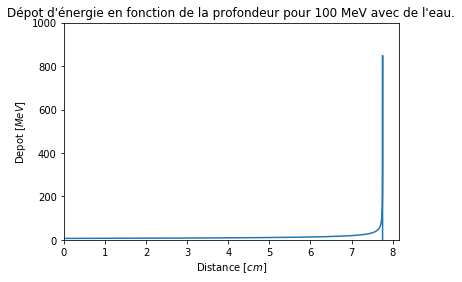

In [72]:
energies = list(np.linspace(100, 0, 10000))

depot = np.array([])
distanceTotale = np.array([])

for i in range(len(energies) - 1):
    pas = integrate.quad(f_eau, energies[i + 1], energies[i])[0]
    depot = np.append(depot, (energies[i] - energies[i + 1]) / pas)
    distanceTotale = np.append(distanceTotale, pas)
distanceTotale = list(np.cumsum(distanceTotale))

plt.plot(distanceTotale, depot)
plt.title("Dépot d'énergie en fonction de la profondeur pour 100 MeV avec de l'eau.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel(r'Depot [$MeV$]')
plt.axis(xmin=0, ymin=0, ymax=1000)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


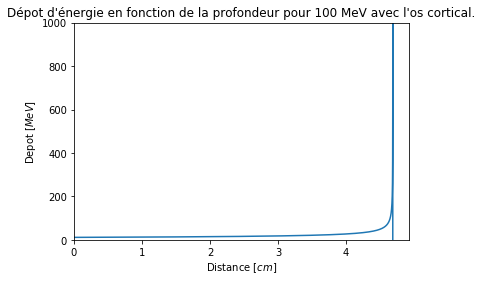

In [73]:
energies = list(np.linspace(100, 0, 10000))

depot = np.array([])
distanceTotale = np.array([])

for i in range(len(energies) - 1):
    pas = integrate.quad(f_os, energies[i + 1], energies[i])[0]
    depot = np.append(depot, (energies[i] - energies[i + 1]) / pas)
    distanceTotale = np.append(distanceTotale, pas)
distanceTotale = list(np.cumsum(distanceTotale))

plt.plot(distanceTotale, depot)
plt.title("Dépot d'énergie en fonction de la profondeur pour 100 MeV avec l'os cortical.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel(r'Depot [$MeV$]')
plt.axis(xmin=0, ymin=0, ymax=1000)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


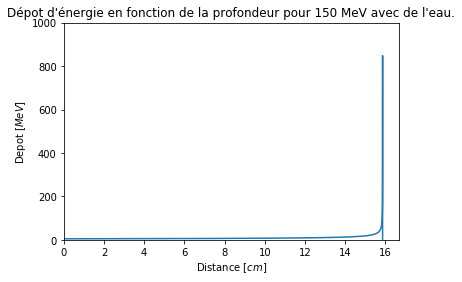

In [74]:
energies = list(np.linspace(150, 0, 10000))

depot = np.array([])
distanceTotale = np.array([])

for i in range(len(energies) - 1):
    pas = integrate.quad(f_eau, energies[i + 1], energies[i])[0]
    depot = np.append(depot, (energies[i] - energies[i + 1]) / pas)
    distanceTotale = np.append(distanceTotale, pas)
distanceTotale = list(np.cumsum(distanceTotale))

plt.plot(distanceTotale, depot)
plt.title("Dépot d'énergie en fonction de la profondeur pour 150 MeV avec de l'eau.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel(r'Depot [$MeV$]')
plt.axis(xmin=0, ymin=0, ymax=1000)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


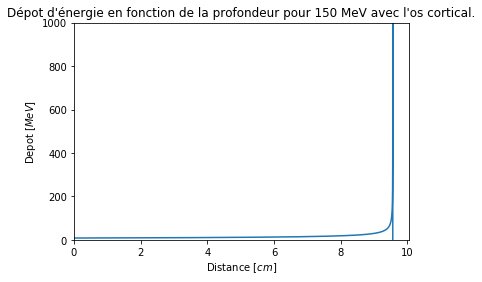

In [75]:
energies = list(np.linspace(150, 0, 10000))

depot = np.array([])
distanceTotale = np.array([])

for i in range(len(energies) - 1):
    pas = integrate.quad(f_os, energies[i + 1], energies[i])[0]
    depot = np.append(depot, (energies[i] - energies[i + 1]) / pas)
    distanceTotale = np.append(distanceTotale, pas)
distanceTotale = list(np.cumsum(distanceTotale))

plt.plot(distanceTotale, depot)
plt.title("Dépot d'énergie en fonction de la profondeur pour 150 MeV avec l'os cortical.")
plt.xlabel(r'Distance [$cm$]')
plt.ylabel(r'Depot [$MeV$]')
plt.axis(xmin=0, ymin=0, ymax=1000)
plt.show()

## Question 14
Le pic de Bragg représente l'endroit où le dépot d'énergie est maximal. Dans le cas de la physique médicale, le pic de Bragg permet de prédire où la majorité de l'énergie des protons va être déposée et donc, il est possible de prédire l'endroit où l'effet d'un faisceau de proton sera maximal.